In [23]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt


a)

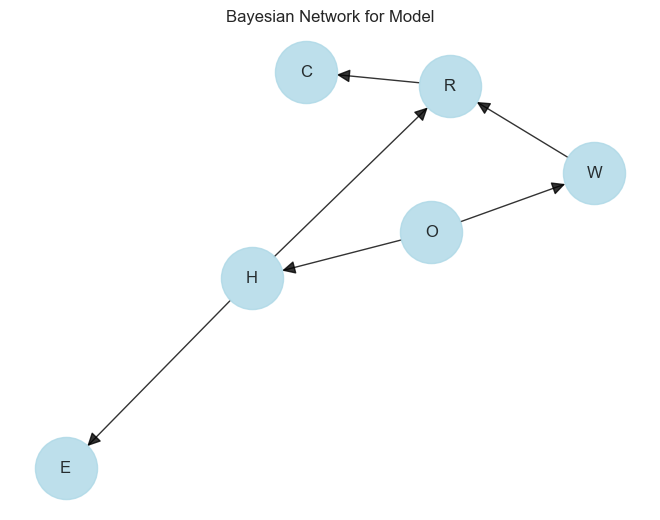

In [24]:


model = DiscreteBayesianNetwork([
    ('O', 'H'),
    ('O', 'W'),
    ('H', 'R'),
    ('W', 'R'),
    ('H', 'E'),
    ('R', 'C')
])

cpd_O = TabularCPD(
    variable='O',
    variable_card=2,
    values=[[0.3], [0.7]],
    state_names={'O': ['cold', 'mild']}
)

cpd_H = TabularCPD(
    variable='H',
    variable_card=2,
    values=[
        [0.9, 0.2],
        [0.1, 0.8],
    ],
    evidence=['O'],
    evidence_card=[2],
    state_names={'H': ['yes', 'no'], 'O': ['cold', 'mild']}
)

cpd_W = TabularCPD(
    variable='W',
    variable_card=2,
    values=[
        [0.1, 0.6],
        [0.9, 0.4],  #
    ],
    evidence=['O'],
    evidence_card=[2],
    state_names={'W': ['yes', 'no'], 'O': ['cold', 'mild']}
)

cpd_R = TabularCPD(
    variable='R',
    variable_card=2,
    values=[
        [0.6, 0.9, 0.3, 0.5],
        [0.4, 0.1, 0.7, 0.5],
    ],
    evidence=['H', 'W'],
    evidence_card=[2, 2],
    state_names={'R': ['warm', 'cool'],
                 'H': ['yes', 'no'],
                 'W': ['yes', 'no']}
)

cpd_E = TabularCPD(
    variable='E',
    variable_card=2,
    values=[
        [0.8, 0.2],
        [0.2, 0.8],
    ],
    evidence=['H'],
    evidence_card=[2],
    state_names={'E': ['high', 'low'], 'H': ['yes', 'no']}
)

cpd_C = TabularCPD(
    variable='C',
    variable_card=2,
    values=[
        [0.85, 0.40],
        [0.15, 0.60],
    ],
    evidence=['R'],
    evidence_card=[2],
    state_names={'C': ['comfortable', 'uncomfortable'],
                 'R': ['warm', 'cool']}
)
model.add_cpds(cpd_O, cpd_H, cpd_W, cpd_R, cpd_E, cpd_C)
assert model.check_model()


G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=2000,
    node_color='lightblue',
    font_size=12,
    arrowsize=20,
    alpha=0.8
)
plt.title("Bayesian Network for Model")
plt.show()

infer = VariableElimination(model)

b)

In [25]:
res1 = infer.query(['H'], evidence={'C': 'comfortable'})
print("P(H=yes | C=comfortable) =", res1.values[0])

res2 = infer.query(['E'], evidence={'C': 'comfortable'})
print("P(E=high | C=comfortable) =", res2.values[0])

map_hw = infer.map_query(['H', 'W'], evidence={'C': 'comfortable'})
print("MAP(H,W | C=comfortable) =", map_hw)

P(H=yes | C=comfortable) = 0.48226326141694925
P(E=high | C=comfortable) = 0.4893579568501696


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

MAP(H,W | C=comfortable) = {'W': 'no', 'H': 'yes'}


c)

W si E  sunt independente conditional de H deoarece H blocheaza drumul de la W la E

O si C nu sunt independente conditioal de R deoarece in graful prezentat la pct a avem drum de la O la C care trece prin R